# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
4. Clustering using Agglomerate Heirarchical Clustering.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## EDA

In [2]:
df = pd.read_csv('Store_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Shape of the dataset

In [3]:
df.shape

(200, 5)

# Descriptive Summary

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Extreme outliers are not present in the dataset.

# Data Types

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Null Value Check

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values are present. in the dataset.

# Column Name Check

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

All the columns are named correctly.

## Data Visualization

In [8]:
plt.style.use('fivethirtyeight')

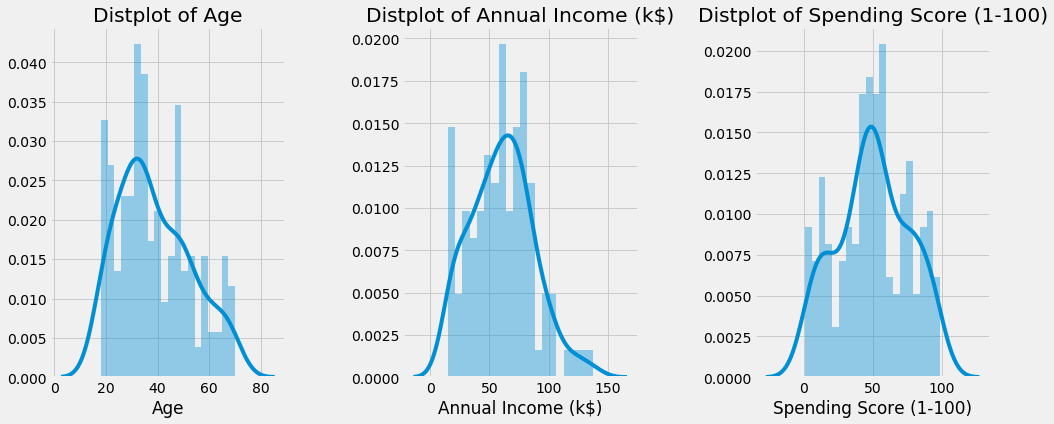

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

All the significant variables in the dataset are normally distributed.

### Count Plot of Gender

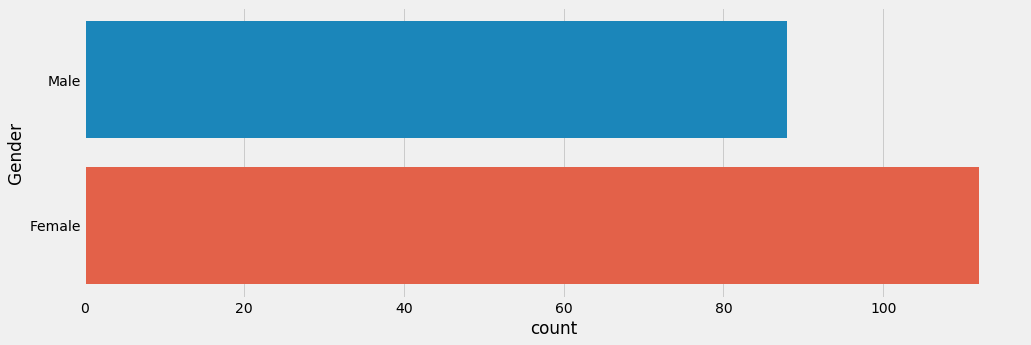

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

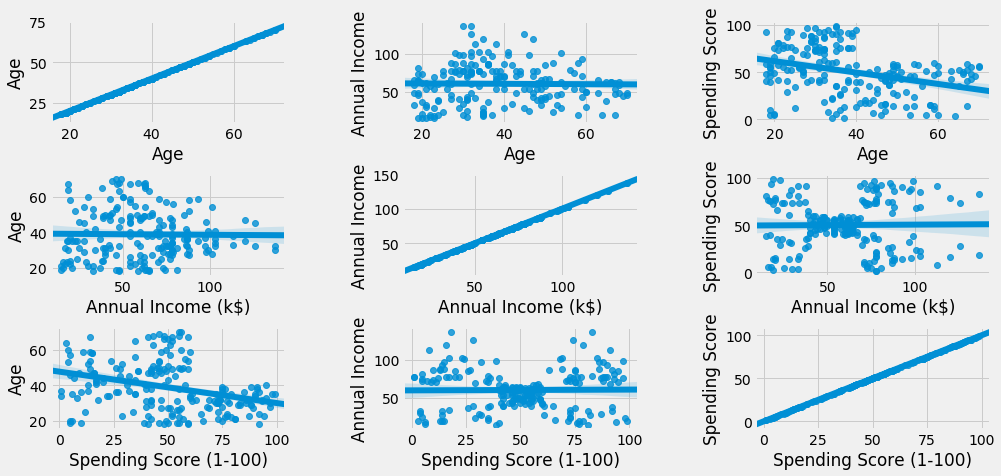

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

There is little to no Correlation between the Age, Annual Income and Spending Score Variables

# Age vs Annual Income w.r.t Gender

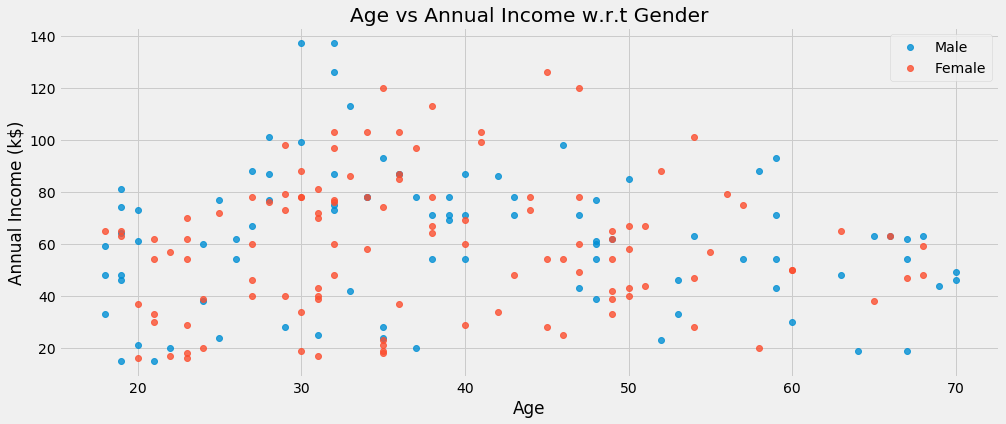

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    sns.regplot(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender]  , label = gender,fit_reg=False)
    
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

No direct correlation between Age, Annual Income and Gender.

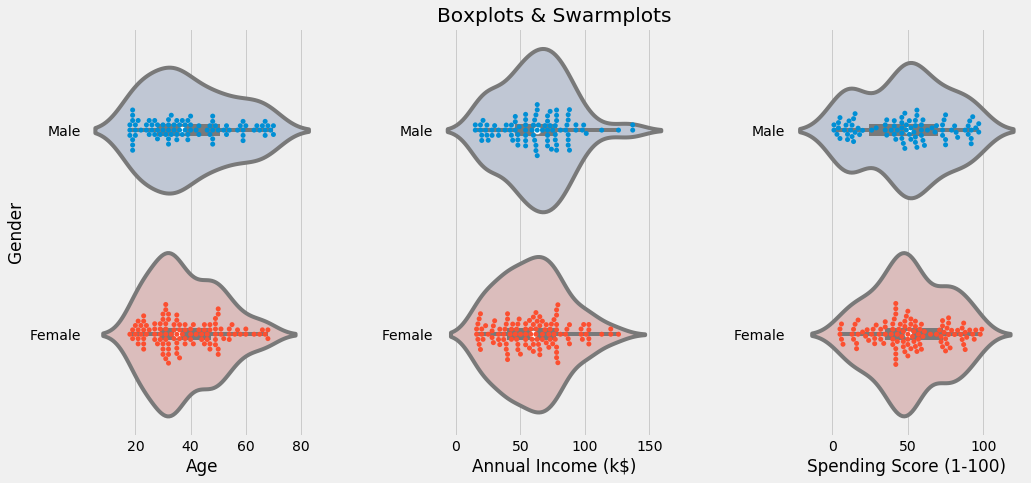

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

Extreme outliers are not present in the dataset and the data is normally distributed as well.

## Clustering using K- means
### 1.Segmentation using Income and Spending Score

In [14]:
X = df.iloc[:, [3, 4]].values

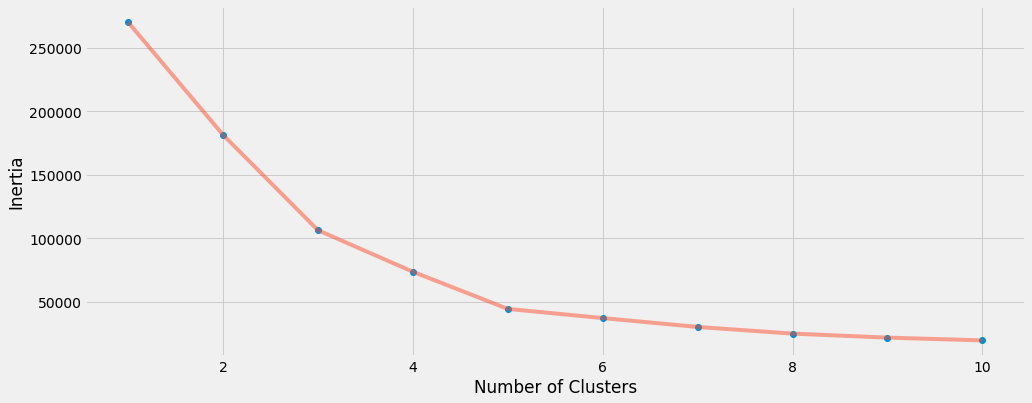

In [15]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Using the Elbow Method we found that the optimal number of clusters is: 5

In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

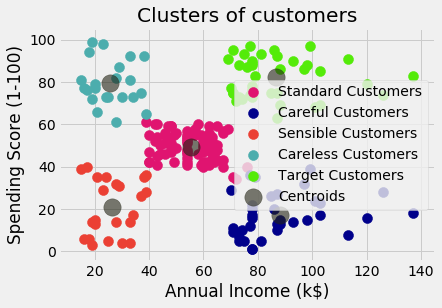

In [17]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#e01470', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'darkblue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = '#eb4034', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = '#4cadad', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = '#54eb09', label = 'Target Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = '#232414', alpha=0.6,label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We obtained 5 clusters for our Customers and labelled them according to the clusters they fall into w.r.t the Annual Income and Spending Score(1-100).

# Heirarchical Clustering

In [51]:
#Using Dendogram to find optimal number of clusters

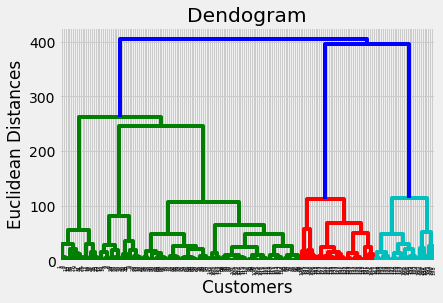

In [52]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [53]:
#Fitting heirarchical clustering to the store dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

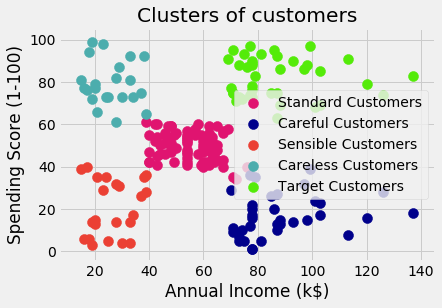

In [54]:
#Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#e01470', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'darkblue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = '#eb4034', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = '#4cadad', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = '#54eb09', label = 'Target Customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We obtained 5 clusters for our Customers and labelled them according to the clusters they fall into w.r.t the Annual Income and Spending Score(1-100).

# Market Basket Analysis Using Apriori
### Steps to solve the problem :
1. Data preprocessing.
2. Importing Libraries and Training Apriori on the dataset.
3. Visualizing the results.
4. Displaying the top 5 Rules/Product Groups.

In [55]:
# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [56]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [57]:
# Visualizing the results
results = list(rules)
for i in results:
    print(i)
    print('**********')

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])
**********
RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])
**********
RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])
**********
RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozense

In [58]:
#Top 5 grouped products
for i in range(0,5):
    print(results[i])
    print('**********')

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])
**********
RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])
**********
RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])
**********
RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozense